In [ ]:
# Recursive function to find
# all topological orderings of a given DAG
def findAllTopologicalOrders(g, path, discovered, N):
    g = g.copy()
    S = deque()
    L = []
    for v, n in enumerate(g.nodes):
        if g.in_degree(n) == 0 and not discovered[v]:
            
            neighbors = list(g.neighbors(n)) 
            for m in neighbors:
                g.remove_edge(n, m)
            
            # include current node in the path
            # and mark it as discovered
            path.append(v)
            discovered[v] = True
            
            findAllTopologicalOrders(graph, path, discovered, N)
            
            neighbors = list(g.neighbors(n)) 
            for m in neighbors:
                g.remove_edge(n, m)
        
        # backtrack: remove current node from the path and
        # mark it as undiscovered
        path.pop()
        discovered[v] = False
        
    # print the topological order if
    # all vertices are included in the path
    if len(path) == N:
        print(path)
        
def printAllTopologicalOrders(graph):
    # get number of nodes in the graph
    N = len(graph.nodes)
 
    # create an auxiliary space to keep track of whether vertex is discovered
    discovered = [False] * N
    
    # list to store the topological order
    path = []
    # find all topological ordering and print them
    findAllTopologicalOrders(graph, path, discovered, N)

In [ ]:
def findAllTopologicalOrders(g, path, discovered, N):
    g = g.copy()
    S = deque()
    L = []
    for v, n in enumerate(g.nodes):
        if g.in_degree(n) == 0 and not discovered[v]:
            
            neighbors = list(g.neighbors(n)) 
            for m in neighbors:
                g.remove_edge(n, m)
            
            # include current node in the path
            # and mark it as discovered
            path.append(v)
            discovered[v] = True
            
            findAllTopologicalOrders(graph, path, discovered, N)
            
            neighbors = list(g.neighbors(n)) 
            for m in neighbors:
                g.remove_edge(n, m)
        
        # backtrack: remove current node from the path and
        # mark it as undiscovered
        path.pop()
        discovered[v] = False
        
    # print the topological order if
    # all vertices are included in the path
    if len(path) == N:
        print(path)
            
            
    while S:
        n = S.pop()
        print('pop', n)
        L.append(n)
        neighbors = list(g.neighbors(n)) 
        for m in neighbors:
            g.remove_edge(n, m)
            if g.in_degree(m) == 0:
                S.append(m)
    
    assert len(g.edges) == 0, "La gráfica tiene un ciclo."
    
    return L

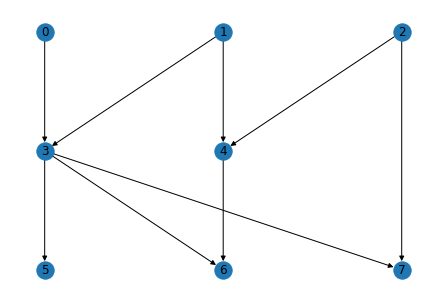

In [2]:
import networkx as nx
from collections import deque

g = nx.DiGraph()
g.add_nodes_from([0,1,2,3,4,5,6,7])
g.add_edges_from([(0,3), (1,3), (1,4), (2,4), (2,7), (3,5), (3,6), (3,7), (4,6)])
pos = {i: (i%3, 3-i//3*3) for i in g.nodes}
pos[5], pos[6], pos[7] = [0,-3], [1,-3], [2,-3]
nx.draw(g, with_labels=True, pos=pos)

In [4]:
g.adj

AdjacencyView({0: {3: {}}, 1: {3: {}, 4: {}}, 2: {4: {}, 7: {}}, 3: {5: {}, 6: {}, 7: {}}, 4: {6: {}}, 5: {}, 6: {}, 7: {}})

In [ ]:
contador = 0
# class to represent a graph object
class Graph:
 
    # Constructor
    def __init__(self, edges, N):
 
        # A List of Lists to represent an adjacency list
        self.adjList = [[] for _ in range(N)]
 
        # stores in-degree of a vertex
        # initialize in-degree of each vertex by 0
        self.indegree = [0] * N
 
        # add edges to the undirected graph
        for (src, dest) in edges:
 
            # add an edge from source to destination
            self.adjList[src].append(dest)
 
            # increment in-degree of destination vertex by 1
            self.indegree[dest] = self.indegree[dest] + 1
 
 
# Recursive function to find
# all topological orderings of a given DAG
def findAllTopologicalOrders(graph, path, discovered, N):
 
    # do for every vertex
    for v in range(N):
 
        # proceed only if in-degree of current node is 0 and
        # current node is not processed yet
        if graph.indegree[v] == 0 and not discovered[v]:
 
            # for every adjacent vertex u of v,
            # reduce in-degree of u by 1
            for u in graph.adjList[v]:
                graph.indegree[u] = graph.indegree[u] - 1
 
            # include current node in the path
            # and mark it as discovered
            path.append(v)
            discovered[v] = True
 
            # recur
            findAllTopologicalOrders(graph, path, discovered, N)
 
            # backtrack: reset in-degree
            # information for the current node
            for u in graph.adjList[v]:
                graph.indegree[u] = graph.indegree[u] + 1
 
            # backtrack: remove current node from the path and
            # mark it as undiscovered
            path.pop()
            discovered[v] = False
 
    # print the topological order if
    # all vertices are included in the path
    if len(path) == N:
        global contador
        contador += 1
        print(path)
 
 
# Print all topological orderings of a given DAG
def printAllTopologicalOrders(graph):
 
    # get number of nodes in the graph
    N = len(graph.adjList)
 
    # create an auxiliary space to keep track of whether vertex is discovered
    discovered = [False] * N
 
    # list to store the topological order
    path = []
 
    # find all topological ordering and print them
    findAllTopologicalOrders(graph, path, discovered, N)
 
# Driver code
if __name__ == '__main__':
 
    # List of graph edges as per above diagram
    edges = [(0,3), (1,3), (1,4), (2,4), (2,7), (3,5), (3,6), (3,7), (4,6)]
 
    print("All Topological sorts")
 
    # Number of nodes in the graph
    N = 8
 
    # create a graph from edges
    graph = Graph(edges, N)
 
    # print all topological ordering of the graph
    printAllTopologicalOrders(graph)
 
# This code is contributed by Priyadarshini Kumari